# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")


# Data Exploration and Cleaning

In [5]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df["Cabin"].fillna('N',inplace=True)
test["Cabin"].fillna('N',inplace=True)

In [12]:
def extract_first_letter(row):
    return row['Cabin'][0]

In [13]:
df['Cabin'] = df.apply(extract_first_letter, axis=1)
test['Cabin'] = test.apply(extract_first_letter, axis=1)
df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [14]:
df["Age"].fillna(df["Age"].mean(),inplace = True)
test["Age"].fillna(test["Age"].mean(),inplace = True)
test["Fare"].fillna(test["Fare"].mean(),inplace = True)

In [15]:
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualizations

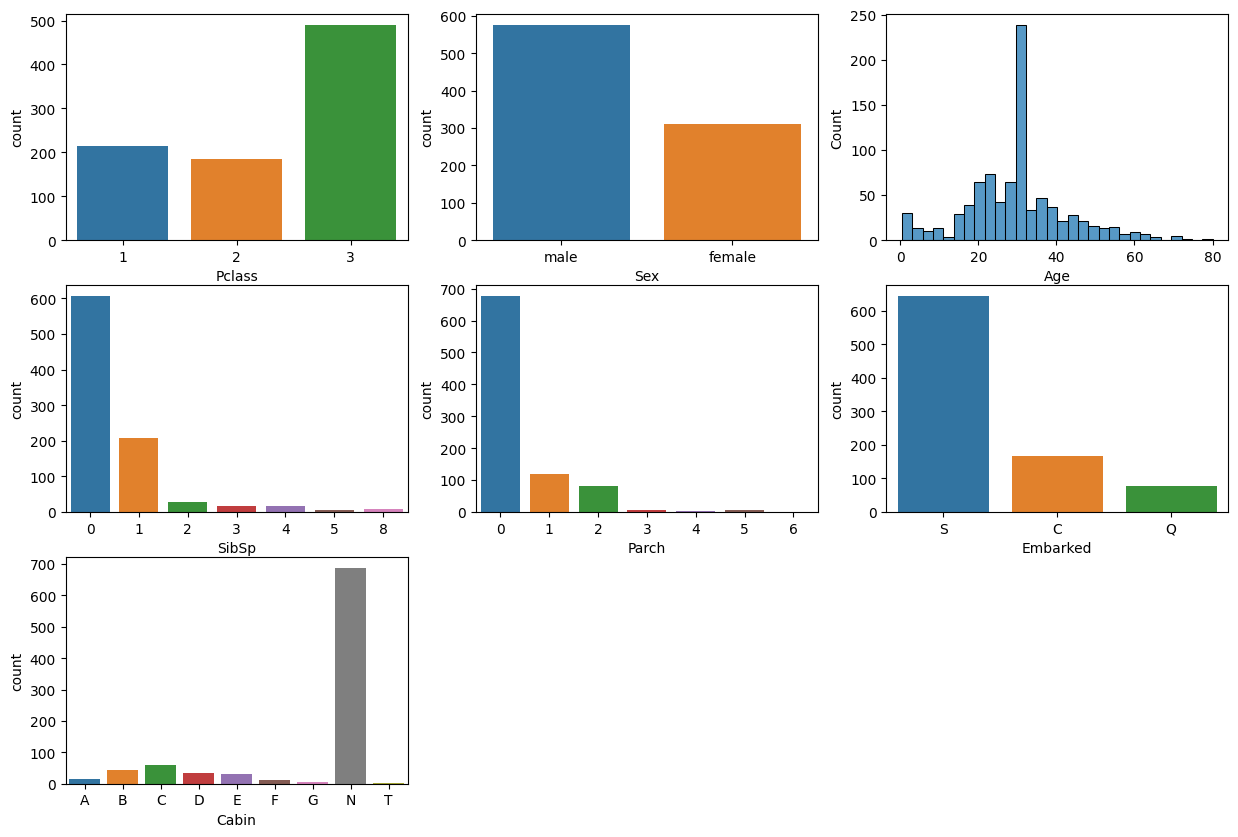

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.countplot(x='Pclass', data=df)

plt.subplot(3, 3, 2)
sns.countplot(x='Sex', data=df)

plt.subplot(3, 3, 3)
sns.histplot(x='Age', data=df)

plt.subplot(3, 3, 4)
sns.countplot(x='SibSp', data=df)

plt.subplot(3, 3, 5)
sns.countplot(x='Parch', data=df)

plt.subplot(3, 3, 6)
sns.countplot(x='Embarked', data=df)

plt.subplot(3, 3, 7)
sns.countplot(x='Cabin', data=df.sort_values(by='Cabin'))

plt.show()

# Label Encoding and Features Scaling

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df1 = df

In [22]:
df1.drop(columns = ['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [23]:
df1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S


In [24]:
categorical_columns = ["Sex","Embarked", "Cabin"]
for i in categorical_columns:
    df1[i] = encoder.fit_transform(df1[i])
    test[i] = encoder.fit_transform(test[i])

In [25]:
df1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,2


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = ["Age","Fare", "Cabin"]
for i in numeric_columns:
    df1[i] = scaler.fit_transform(np.array(df1[i]).reshape(-1,1))
    test[i] = scaler.fit_transform(np.array(test[i]).reshape(-1,1))


# Model Training

In [27]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
x = df1.drop(["Survived", "Embarked"],axis = 1)
y = df1["Survived"]
test = test.drop(['PassengerId', 'Name', 'Ticket', "Embarked"],axis = 1)

In [29]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,0.271174,1,0,0.014151,0.875
1,1,0,0.472229,1,0,0.139136,0.250
2,3,0,0.321438,0,0,0.015469,0.875
3,1,0,0.434531,1,0,0.103644,0.250
4,3,1,0.434531,0,0,0.015713,0.875


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [32]:
svm = SVC()
svm.fit(x_train, y_train)
svm_score = svm.score(x_test, y_test)
print(svm_score)

0.7921348314606742


In [33]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train, y_train)
ada_score = ada.score(x_test, y_test)
print(ada_score)

0.8146067415730337


In [34]:
random = RandomForestClassifier(random_state=42, verbose=0)
random.fit(x_train, y_train)
random_score = random.score(x_test, y_test)
print(random_score)

0.7640449438202247


In [35]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(x_train, y_train)
lgbm_score = lgbm.score(x_test, y_test)
print(lgbm_score)

0.7921348314606742


In [36]:
xgb = XGBClassifier(verbosity=0)
xgb.fit(x_train, y_train)
xgb_score = xgb.score(x_test, y_test)
print(xgb_score)

0.8089887640449438


# Hyperparamter tuning


In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV


In [38]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(SVC(),param_grid=param_grid,cv=5)
svm_grid.fit(x_train,y_train)
print(svm_grid.best_params_)
svm_best = svm_grid.best_estimator_
accuracy_score(svm_best.predict(x_test),y_test)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


0.8089887640449438

In [39]:
ada_param = {
    'n_estimators':[100,1000,500,1500],
    'learning_rate':[0.01,0.1,1,10]
}
ada_grid = GridSearchCV(AdaBoostClassifier(),param_grid=ada_param,cv=2)
ada_grid.fit(x_train,y_train)
print(ada_grid.best_params_)
ada_Best = ada_grid.best_estimator_
accuracy_score(ada_Best.predict(x_test),y_test)

{'learning_rate': 0.01, 'n_estimators': 500}


0.8033707865168539

In [40]:
rand_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

rand_grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_param, cv=5, n_iter=20, random_state=42)
rand_grid.fit(x_train,y_train)
print(rand_grid.best_params_)
rand_Best = rand_grid.best_estimator_
accuracy_score(rand_Best.predict(x_test),y_test)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}


0.797752808988764

In [41]:
print(accuracy_score(rand_Best.predict(x_test),y_test))

0.797752808988764


In [42]:
xgb_param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2]
}


xgb_grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_param, cv=5, n_iter=50, random_state=42)
xgb_grid.fit(x_train,y_train)
print(xgb_grid.best_params_)
xgb_Best = xgb_grid.best_estimator_
accuracy_score(xgb_Best.predict(x_test),y_test)


{'subsample': 0.9, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}


0.8033707865168539

In [43]:
# I am comenting this because this is generating lot of unwanted warnings that take up lot
# of the space in viewing the results

#lgbm_param = {
#    'num_leaves': [20, 30, 40],
#   'learning_rate': [0.01, 0.1, 0.3],
#    'max_depth': [3, 5, 7],
#   'min_child_samples': [20, 30, 40],
#    'subsample': [0.6, 0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'reg_alpha': [0, 0.1, 0.5],
#    'reg_lambda': [0, 0.1, 0.5]
#}


#lgbm_grid = RandomizedSearchCV(LGBMClassifier(), param_distributions=lgbm_param, cv=5, n_iter=50, random_state=42)
#lgbm_grid.fit(x_train,y_train)


In [44]:
#print(lgbm_grid.best_params_)


In [45]:

lgbm_best = LGBMClassifier(subsample= 0.8, reg_lambda= 0.1, reg_alpha= 0.5,
                           num_leaves= 20, min_child_samples= 30, max_depth=7,
                           learning_rate= 0.3, colsample_bytree= 0.6)
lgbm_best.fit(x_train,y_train)
accuracy_score(lgbm_best.predict(x_test),y_test)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.8202247191011236

In [46]:
accuracy_score(lgbm_best.predict(x_test),y_test)


0.8202247191011236

In [47]:
from sklearn.ensemble import VotingClassifier


In [48]:
voting = VotingClassifier(estimators=[('svm_best',svm_best),('ada_Best',ada_Best),
                                      ('rand_Best',rand_Best),('xgb_Best',xgb_Best),
                                     ("lgbm_best",lgbm_best)]
                         , weights=[5,4,1,2, 3], voting='hard')
voting.fit(x,y)

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('svm_best', SVC(C=10, gamma=0.1)),
                             ('ada_Best',
                              AdaBoostClassifier(learning_rate=0.01,
                                                 n_estimators=500)),
                             ('rand_Best',
                              RandomForestClassifier(max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200)),
                             ('xgb_Best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None...
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm_best',
                              LGBMClassifier(colsample_bytree=0.6,
                                             learning_rate=0.3, max_depth=7,
                                             min_child_samples=30,
                                             num_leaves=20, reg_alpha=0.5,
                                             reg_lambda=0.1, subsample=0.8))],
                 weights=[5, 4, 1, 2, 3])

In [49]:
accuracy_score(voting.predict(x_test),y_test)

0.8146067415730337

In [50]:
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
predictions = voting.predict(test)
submission["Survived"] = predictions
submission.to_csv("submission.csv", index=False)